In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()
import os

In [3]:
api_key = os.getenv('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(
    model = 'gemini-2.5-flash',
    temperature = 0.7,
    google_api_key = api_key
)

In [4]:
class BlogState(TypedDict):
    title : str
    outline : str
    content : str

In [ ]:
def generate_outline(state : BlogState) -> BlogState:
    title = state['title']

    prompt = f"generate a detailed outline for the topic {title}. later i will use this to write detailed blog"

    outline = llm.invoke(prompt).content

    state['outline'] = outline

    return state

# generate_outline({'title': 'raise of AI in india'})

{'title': 'raise of AI in india',
 'outline': 'Here\'s a detailed outline for a blog post on "The Rise of AI in India," designed to cover various facets comprehensively.\n\n---\n\n## Blog Post Outline: The Rise of AI in India – A New Digital Frontier\n\n**I. Introduction: India\'s AI Awakening**\n\n*   **A. The Global AI Imperative:**\n    *   Brief overview of AI\'s transformative power globally (economy, society, industries).\n    *   The race for AI leadership among nations.\n*   **B. India\'s Unique Position:**\n    *   Large, young, tech-savvy population.\n    *   Rapid digital transformation (Digital India, UPI, Aadhaar).\n    *   Growing startup ecosystem.\n    *   The "Jio Effect" – unprecedented data access.\n*   **C. Thesis Statement:** India is at a pivotal moment in its AI journey, poised to leverage this technology for economic growth and social good, despite facing unique challenges.\n*   **D. What This Blog Will Cover:** A roadmap of the topics to be explored (current la

In [6]:
def generate_content(state : BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"generate a detailed blog on the topic {title} using the outline provided. outline \n {outline}"

    content = llm.invoke(prompt).content

    state['content'] = content

    return state


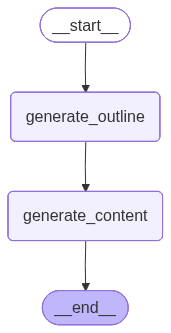

In [7]:
graph = StateGraph(BlogState)

graph.add_node('generate_outline', generate_outline)
graph.add_node('generate_content', generate_content)


graph.add_edge(START, 'generate_outline')
graph.add_edge('generate_outline', 'generate_content')
graph.add_edge('generate_content', END)

workflow = graph.compile()

workflow

In [10]:
init_state = {'title': "raise of AI in india"}

final_state = workflow.invoke(init_state)

print(f"Outline : \n {final_state['outline']} \n Blog Content : \n{final_state['content']}")

Outline : 
 Here's a detailed outline for a blog post on the "Rise of AI in India," designed to cover various facets comprehensively.

---

## Blog Post Outline: The Rise of AI in India: Opportunities, Challenges, and the Road Ahead

**Blog Title Options:**
* India's AI Awakening: Charting the Course of a Technological Revolution
* From Bharat to Global: The Ascendancy of AI in India
* Decoding India's AI Journey: Innovation, Impact, and the Future
* The AI Paradox: How India is Shaping and Being Shaped by Artificial Intelligence

---

**I. Introduction: The Global AI Wave and India's Position**
    A. **Hook:** The unparalleled global impact of Artificial Intelligence, transforming industries and societies worldwide.
    B. **Context:** India's unique position – a rapidly digitizing economy, vast talent pool, and complex societal challenges.
    C. **Thesis Statement:** India is not just a consumer but an increasingly significant player in the global AI landscape, leveraging its stren